# Intuit / Quicken Quickbooks Group Assignment
#### Class: Marketing Analytics (EWMBA263 -1)
#### Team: Albert Deng, Peter Pang, Alex Im, and DJ Prahladka

Import data and look at the variables available

In [19]:
import pandas
import shared.mba263 as mba263
import matplotlib.pyplot as plt
import numpy as np
data = pandas.read_csv('shared/intuit.csv')

In [20]:
data.head(10)

,id,sex,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1
0,1,U,1,99999,20,1,129.5,11,1,0,0,0,0
1,2,U,1,99999,20,2,65.0,4,14,0,0,0,0
2,3,U,1,99999,20,1,24.5,13,36,1,0,0,0
3,4,U,1,99999,20,1,80.5,5,19,1,0,0,0
4,5,U,1,99999,20,1,111.0,14,7,0,0,0,0
5,6,U,1,99999,20,1,61.5,14,20,0,0,1,0
6,7,U,1,99999,20,1,56.0,5,27,0,0,1,0
7,8,U,1,99999,20,1,39.5,4,2,0,0,0,0
8,9,U,1,99999,20,1,22.0,17,1,0,0,0,1
9,10,U,1,99999,20,2,113.0,7,15,0,0,0,0


In [21]:
data.describe()

,id,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1
count,20000.000000,20000.000000,20000.0000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,0.244400,54350.2613,10.499000,2.079450,93.581000,15.779650,15.751400,0.208250,0.027100,0.215600,0.048050
std,5773.647028,0.429742,32776.4059,5.766755,1.246361,82.601398,9.527331,10.020435,0.406067,0.162379,0.411248,0.213877
min,1.000000,0.000000,0.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.750000,0.000000,23451.0000,5.000000,1.000000,37.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,10000.500000,0.000000,55402.5000,10.500000,2.000000,71.000000,15.000000,15.000000,0.000000,0.000000,0.000000,0.000000
75%,15000.250000,0.000000,89018.7500,15.250000,3.000000,124.500000,24.000000,24.000000,0.000000,0.000000,0.000000,0.000000
max,20000.000000,1.000000,99999.0000,20.000000,5.000000,937.500000,36.000000,36.000000,1.000000,1.000000,1.000000,1.000000


Add binary variables for sex

In [22]:
data['male']=1*(data['sex']=='M')
data['female']=1*(data['sex']=='F')
data['both_sex']=1*(data['sex']=='B')
data['unknown_sex']=1*(data['sex']=='U')

Run logistic regression with all variables (removed unknown sex, because that is 100% correlated with combination of male, female, and both_Sex), (removed zip and used zip bins instead)

In [23]:
variables = ['male','female','both_sex','bizflag','zip_bins',
                                'numords','dollars','last','sincepurch','version1','owntaxprod','upgraded']
res = mba263.logit_reg(data['res1'],data[variables])

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.17870651271101062
            Iterations: 89
            Function evaluations: 95
            Gradient evaluations: 89


Predict the response rate for the 1st mail

In [24]:
data['p_res1']=res.predict()

Plot the gains table

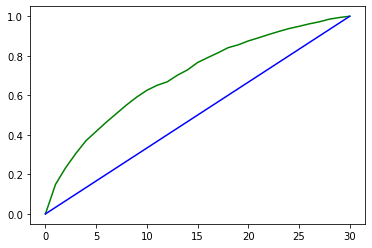

In [25]:
gains1=mba263.gain(data['res1'],data['p_res1'],bins=30)
plt.plot(gains1,'g')
plt.plot([0,30],[0,1],'b')

Try a neural network model

In [26]:
result_nn = mba263.neural_network(data['res1'],data[ variables ])

In [27]:
data['p_nn'] = result_nn.predict(data[ variables ])

See if NN gains are better than logistic regression

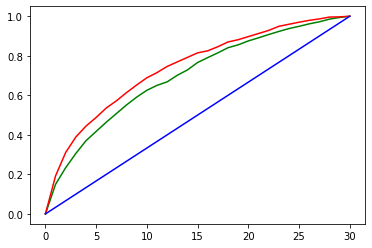

In [28]:
gains_nn=mba263.gain(data['res1'],data['p_nn'],30)
plt.plot(gains1,'g')
plt.plot(gains_nn,'r')
plt.plot([0,30],[0,1],'b')

Predict the response rate for the 2nd mail as half the probability of the first mail

In [7]:
data['p_res2']=data['p_res1']/2

Identify the people to send the second mail as the people whose response rate is higher than breakeven and that did not respond in the first mail

In [8]:
breakeven = 0.0235
data['second_mail'] = 1*(data['p_res2']>=breakeven)&(data['res1']==0)

Calculate how many people are included in the second mail

In [9]:
len_second_mail = len(data[data['second_mail']==1])

Calculate Expected Profit from second mail

In [10]:
mail_cost = 1.41
profit_per_customer = 60
profit_second_mail = (profit_per_customer*data[(data['second_mail'] == 1)]['p_res2'].mean()*len_second_mail)-(mail_cost*len_second_mail)
print(profit_second_mail)

7609.886255947413
